In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# Download the dataset from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
clothes_list = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
# Number of training and testing data
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
# Plot first few images
def plot_picture(images,labels,test_labels,n=9):
    """
    Display a plot of n images and their labels.
    """
    plt.figure(figsize=(n+3,n+3))
    for i in range(n):
        if labels[i] == test_labels[i]:
            color = 'blue'
        else:
            color = 'red'
        # Define subplot
        plt.subplot(int(n**0.5),int(n**0.5), i+1)
        # Plot raw pixel data
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
        plt.title(clothes_list[labels[i]],color=color)

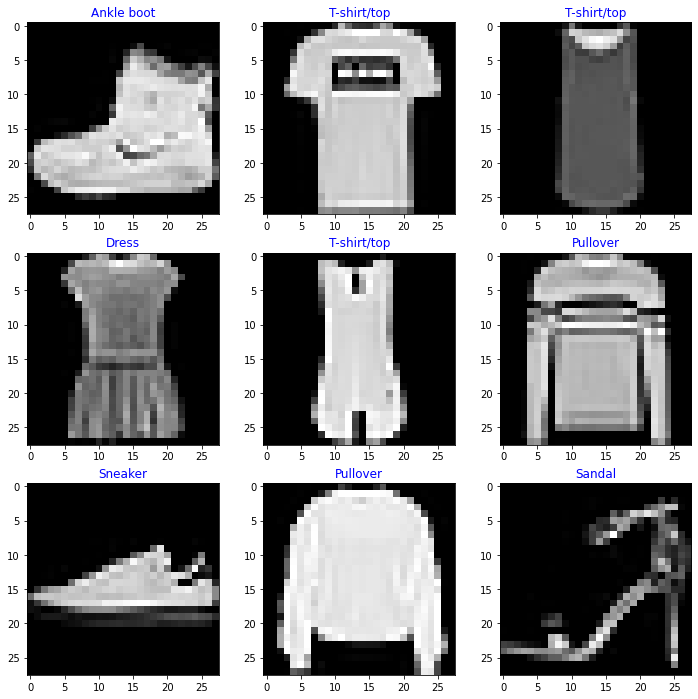

In [6]:
plot_picture(train_images,train_labels,train_labels,n=9)

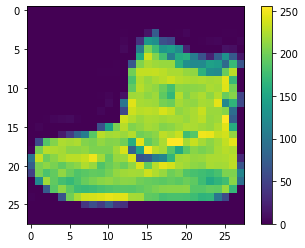

In [7]:
# See the pixel of the first picture in the training set, the value between 0 and 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Scale these values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images.shape

(60000, 28, 28)

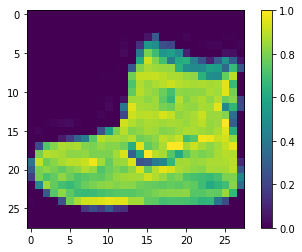

In [9]:
# See the pixel of the first picture in the training set, the value between 0 and 1
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
NUN_EPOCHS = 100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [11]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

r = model.fit(train_images,train_labels,
          validation_data=(test_images,test_labels),
          callbacks=[early_stopping],
          epochs=NUN_EPOCHS)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6158 - accuracy: 0.7811 - val_loss: 0.4024 - val_accuracy: 0.8516
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8620 - val_loss: 0.3949 - val_accuracy: 0.8561
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8758 - val_loss: 0.3718 - val_accuracy: 0.8608
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.8865 - val_loss: 0.3798 - val_accuracy: 0.8595
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2928 - accuracy: 0.8913 - val_loss: 0.3981 - val_accuracy: 0.8575
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8963 - val_loss: 0.3647 - val_accuracy: 0.8728
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2589 - accuracy: 0.9017 - val_loss: 0.3429 - val_ac

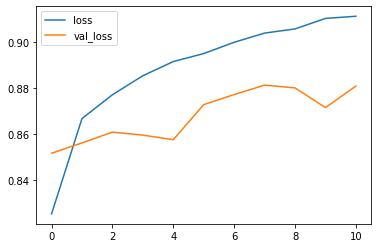

In [12]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend();

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3426 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


In [14]:
test_preds = model.predict(test_images)
test_preds = [test_pred.argmax() for test_pred in test_preds]

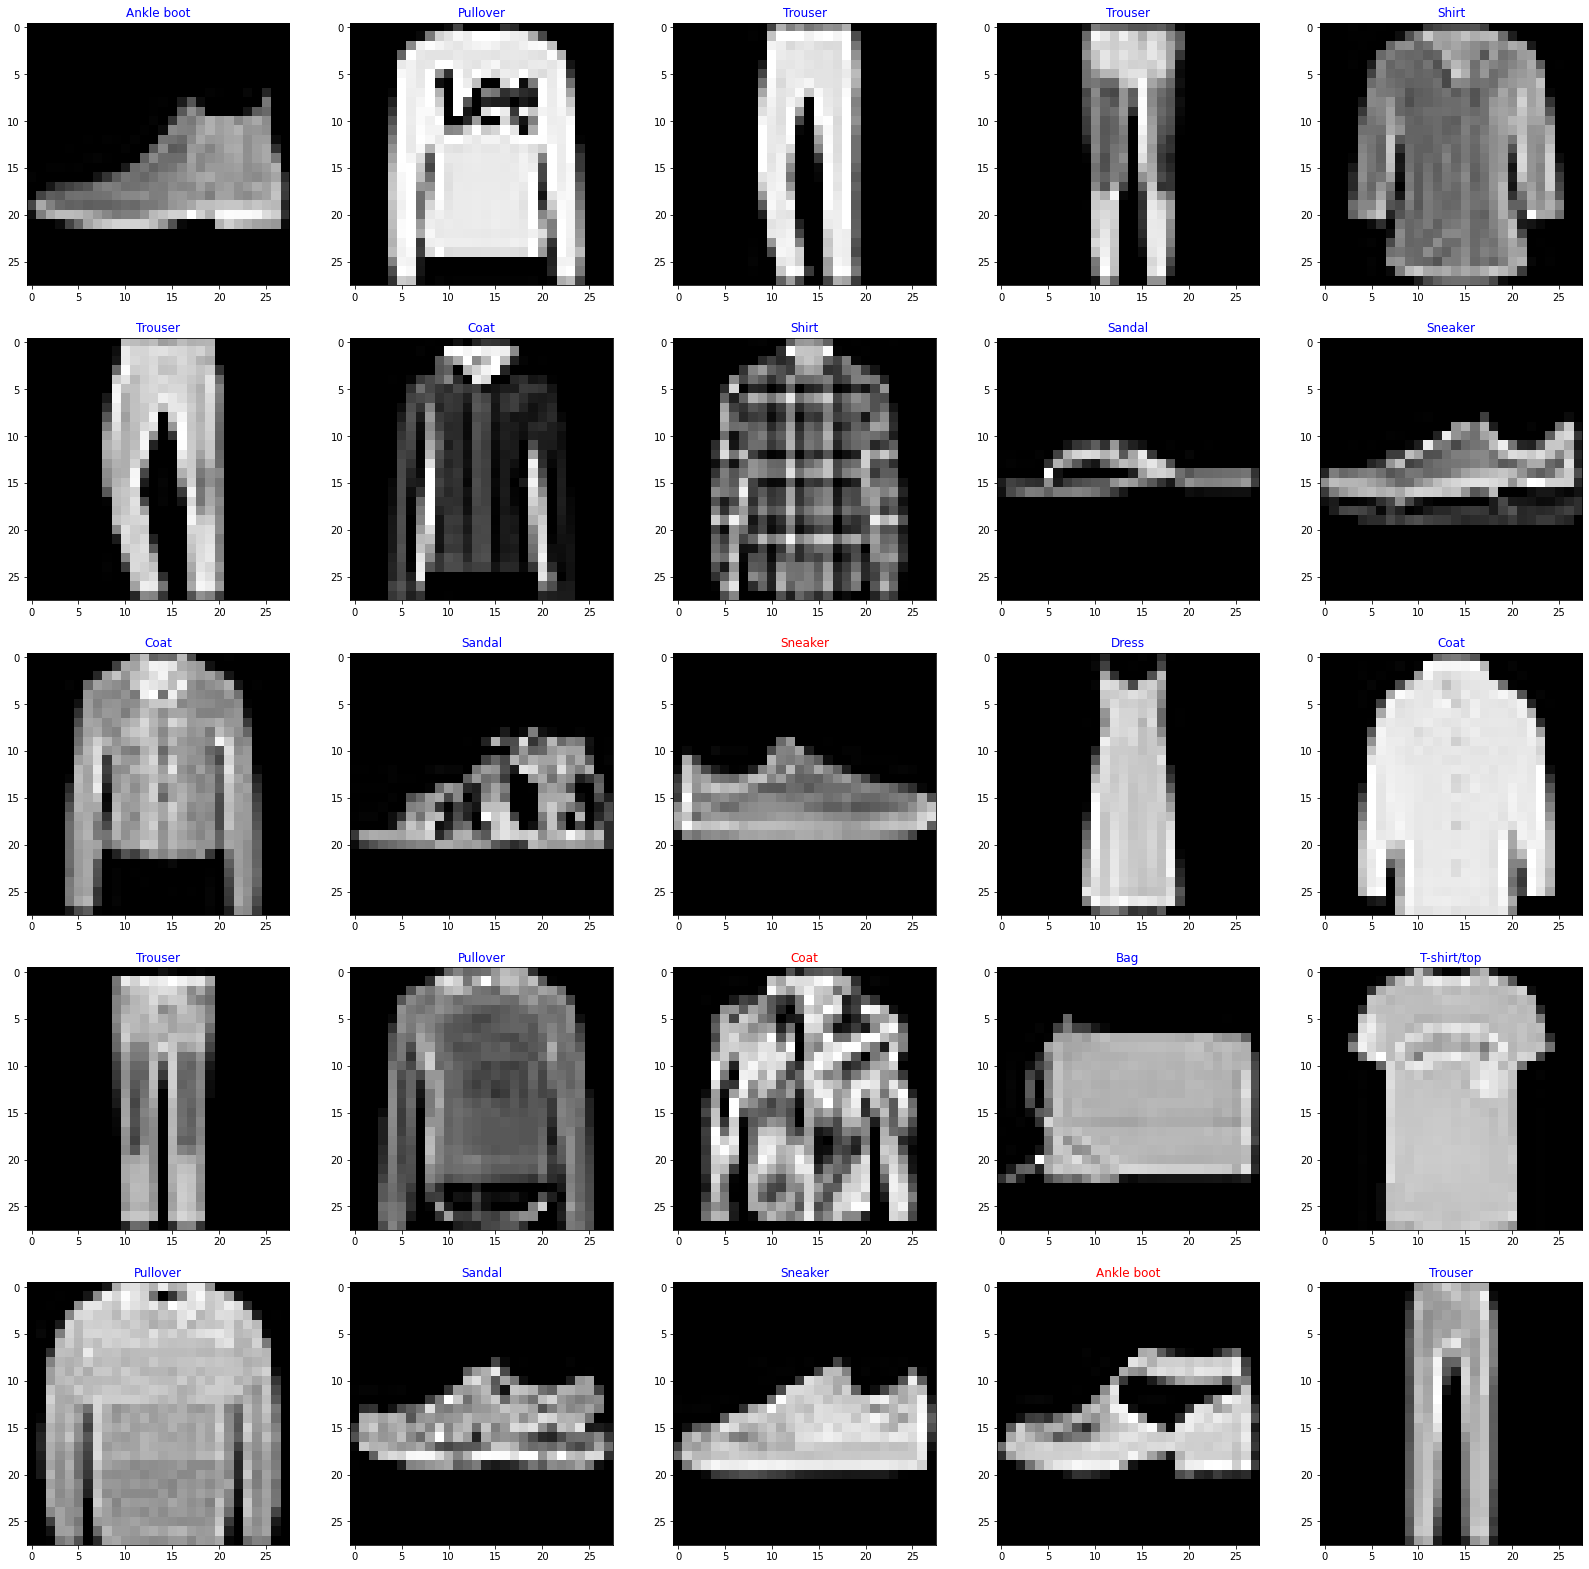

In [15]:
plot_picture(test_images,test_labels,test_preds,n=25)

In [16]:
IMG_SIZE = 28

def process_image(image_path,img_size=IMG_SIZE):
    """
    Take an image file path and turn image into a Tensor.
    """
    image = tf.io.read_file(image_path) # Read image file
    image = tf.image.decode_jpeg(image,channels=1) # Turn the image into 1 channels RGB
    image = tf.image.convert_image_dtype(image,tf.float32) # Turn the value 0-255 to 0-1
    image = tf.image.resize(image,size=[img_size,img_size]) # Resize the image to 224x224
    image = np.array(image).reshape(28,28)
    image = (-1*image+1)
    return image 

In [17]:
img_path = "test/1.jpg"
img_real = process_image(img_path)

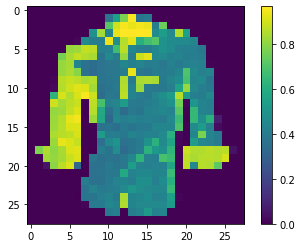

In [18]:
# See the pixel of the first picture in the training set, the value between 0 and 255
plt.figure()
plt.imshow(img_real)
plt.colorbar()
plt.grid(False)
plt.show()

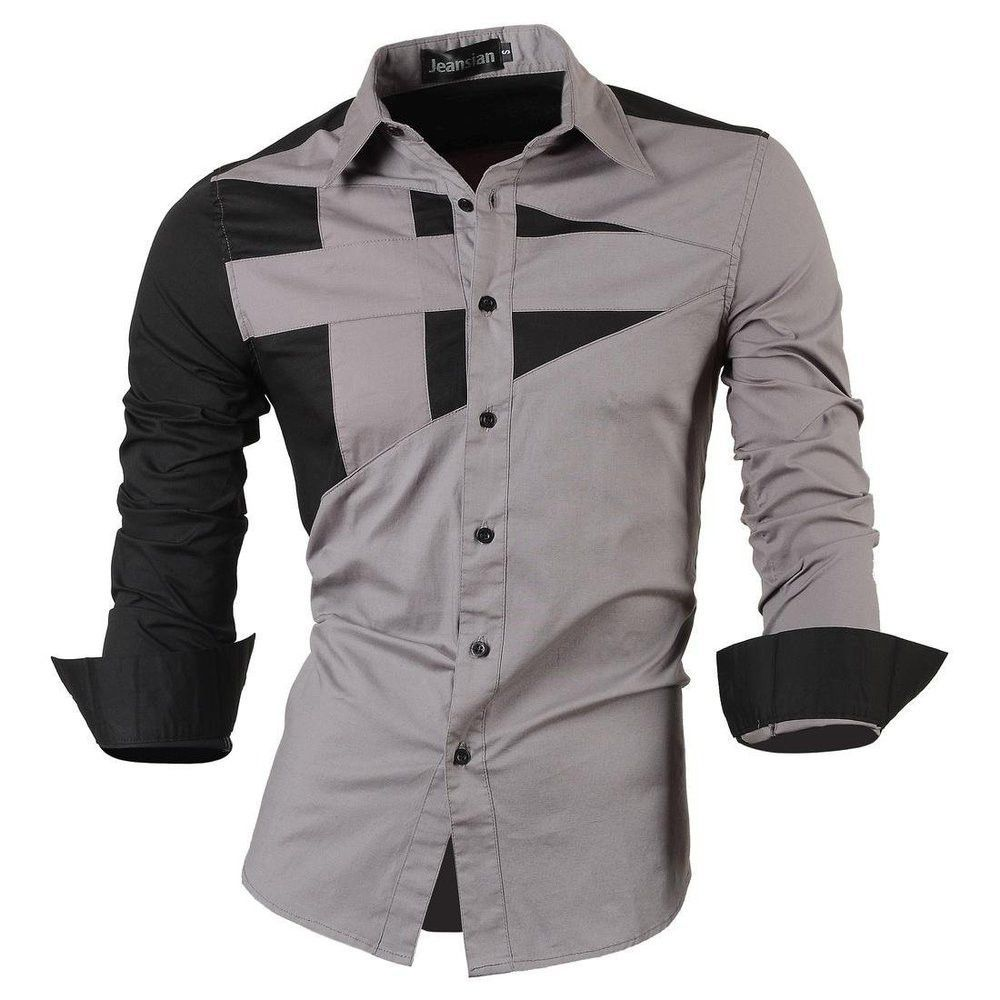

In [19]:
from IPython.display import Image

Image(img_path,width=300,height=300)

In [20]:
predictions_single = model.predict(img_real.reshape(1,28,28))
predicted_list = []
for i,predict in enumerate(predictions_single[0],0):
    predicted_list.append([predict,clothes_list[i]])
predicted_list = sorted(predicted_list,reverse=True)
for predicted in predicted_list:
    print(f"{predicted[1]}: {predicted[0]*100:.2f}%")

Shirt: 99.84%
Coat: 0.11%
T-shirt/top: 0.05%
Pullover: 0.00%
Dress: 0.00%
Bag: 0.00%
Sandal: 0.00%
Trouser: 0.00%
Ankle boot: 0.00%
Sneaker: 0.00%
